<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Daniel_Benson_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [2]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-11-03 06:07:13--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [         <=>        ]  21.66M   429KB/s    in 53s     

2019-11-03 06:08:07 (421 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22709125]



In [3]:
!unzip LoanStats_2018Q4.csv.zip


Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [4]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [5]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","3978.52","3978.52","2271.97","2271.97","1621.48","650.49","0.0","0.0","0.0","Oct-2019","190.21","Nov-2019","Oct-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

Load Lending Club Data

In [6]:
# Read in the dataset and skip the unneccesary rows and footers
import pandas as pd
df = pd.read_csv("LoanStats_2018Q4.csv", skiprows=1, skipfooter=2, engine='python')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,...,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,...,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9025.41,9025.41,2822.600000,2822.60,...,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13271.86,13271.86,6236.010000,6236.01,...,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3014.03,3014.03,1291.210000,1291.21,...,0.0,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Look at shape and columns of file
print(df.shape)
df.columns

(128412, 144)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)

In [8]:
# How much missing data?
df.isnull().sum().sort_values(ascending=False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128283
                                               ...  
inq_last_12m                                       0
acc_open_past_24mths                               0
chargeoff_within_12_mths                           0
delinq_amnt                                        0
inq_fi                                             0
Length: 144, dtype: int64

In [9]:
# Fix the options so we can see more
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

df.isnull().sum().sort_values(ascending=False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128283
hardship_type                                 128276
hardship_last_payment_amount                  128276
hardship_payoff_balance_amount                128276
hardship_reason                               128276
hardship_loan_status                          128276
hardship_dpd                                  128276
hardship_length                               128276
payment_plan_start_date                       128276
hardship_end_date                             128276
hardship_start_date                           128276
hardship_amount                               128276
deferral_term                                 128276
hardship_status                               128276
settlement_percentage                         

Work with Strings

In [10]:
# Identify a column that shouldn't be a string
df['int_rate'].head()

0     14.47%
1     22.35%
2     23.40%
3     18.94%
4     10.72%
Name: int_rate, dtype: object

In [11]:
# What is the data type of this column?
df['int_rate'].dtype

dtype('O')

In [12]:
# What is the value of the first cell?
# Print int_rate0 in two different ways to compare the output and true value
int_rate0 = df.loc[0, 'int_rate']
print(int_rate0)
int_rate0

 14.47%


' 14.47%'

In [13]:
# Find python method for removing string values
int_rate0.strip()

'14.47%'

In [14]:
# Use strip to get rid of the %
int_rate0.strip('%')

' 14.47'

In [15]:
# Remove both at the same time
int_rate0.strip().strip('%')

'14.47'

In [16]:
# Which version of pandas are we running?
pd.__version__

'0.25.2'

In [17]:
# Now we can convert from string to float
float(int_rate0.strip().strip('%'))

14.47

In [18]:
# Confirm that did what we wanted
print(type(int_rate0.strip().strip('%')))
print(type(float(int_rate0.strip().strip('%'))))

<class 'str'>
<class 'float'>


Convert Int Rate

In [0]:
# Write function
def int_rate_to_float(mystring):
  return float(mystring.strip().strip('%'))

In [20]:
# Test function
int_rate_to_float(int_rate0)

14.47

In [21]:
# Apply function to whole columns. Check columns list to ensure column creation worked
df['int_rate_float'] = df['int_rate'].apply(int_rate_to_float)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float'],
      dtype='object', length=145)

In [22]:
# Compare the old and new columns
df[['int_rate', 'int_rate_float']].head()

,int_rate,int_rate_float
0,14.47%,14.47
1,22.35%,22.35
2,23.40%,23.40
3,18.94%,18.94
4,10.72%,10.72


In [23]:
# Confirm that we can now do math on the column
df['int_rate_double'] = df['int_rate_float'] * 2
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_last_payment_amount', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'int_rate_float', 'int_rate_double'],
      dtype='object', length=146)

In [24]:
# Compare old and new
df[['int_rate', 'int_rate_float', 'int_rate_double']].head()

,int_rate,int_rate_float,int_rate_double
0,14.47%,14.47,28.94
1,22.35%,22.35,44.70
2,23.40%,23.40,46.80
3,18.94%,18.94,37.88
4,10.72%,10.72,21.44


Clean emp_title

In [25]:
# Explore the emp_title columns
df[['emp_title', 'int_rate']].sample(6)

,emp_title,int_rate
90209,Senior Quality Engineer,17.97%
51449,Support Specialist,8.19%
91971,Assistant Buyer,6.11%
51139,Production Assistant,7.02%
124472,Driver,15.02%
11822,Heavy cleaner,13.56%


In [26]:
# Check count of all possible titles
df['emp_title'].nunique()

43892

In [27]:
# Show most popular titles
df['emp_title'].value_counts(ascending=False).head()

Teacher             2090
Manager             1773
Registered Nurse     952
Driver               924
RN                   726
Name: emp_title, dtype: int64

In [28]:
# Let's remove the dropna to get a better picture
df['emp_title'].value_counts(ascending=False, dropna=False).head()

NaN                 20947
Teacher              2090
Manager              1773
Registered Nurse      952
Driver                924
Name: emp_title, dtype: int64

In [29]:
# We have some nulls
df['emp_title'].isnull().sum()

20947

In [30]:
# We can also check the number of non nulls
df['emp_title'].notnull().sum()

107465

In [0]:
  # import numpy
  import numpy as np


In [0]:
# Create function that will clean up our titles
# if isinstance checks title for that dtype
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'


In [33]:
# Test our function
examples = ['owner', 'supervisor', 'project manager', np.NaN]

for item in examples:
  print(clean_title(item))

Owner
Supervisor
Project Manager
Unknown


In [34]:
# Now lets apply to entire column
df['emp_title_clean'] = df['emp_title'].apply(clean_title)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_float',
       'int_rate_double', 'emp_title_clean'],
      dtype='object', length=147)

In [35]:
# Compare old and new
df[['emp_title', 'emp_title_clean']].head()

,emp_title,emp_title_clean
0,Staff Physician,Staff Physician
1,Director of Sales,Director Of Sales
2,NaN,Unknown
3,Receptionist,Receptionist
4,Extrusion assistant,Extrusion Assistant


In [36]:
# Check for missing values
df['emp_title_clean'].isnull().sum()

0

In [37]:
# Check value counts again
df['emp_title_clean'].value_counts(ascending=False, dropna=False).head()

Unknown             20947
Teacher              2557
Manager              2395
Registered Nurse     1418
Driver               1258
Name: emp_title_clean, dtype: int64

Create emp_title_manager

In [38]:
df['emp_title_manager'] = df['emp_title_clean'].str.contains('Manager')
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'int_rate_float', 'int_rate_double', 'emp_title_clean',
       'emp_title_manager'],
      dtype='object', length=148)

In [39]:
# Compare old and new
df[['emp_title_clean', 'emp_title_manager']].head()

,emp_title_clean,emp_title_manager
0,Staff Physician,False
1,Director Of Sales,False
2,Unknown,False
3,Receptionist,False
4,Extrusion Assistant,False


In [40]:
# Any empty data?
df['emp_title_manager'].isnull().sum()

0

Work with dates

In [41]:
# List all columns and their dtypes
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [42]:
# Which columns are dates
for col in df.columns:
  if (col.endswith('_d')) or (col.endswith('_date')):
    print(col)

issue_d
last_pymnt_d
next_pymnt_d
last_credit_pull_d
hardship_start_date
hardship_end_date
payment_plan_start_date
debt_settlement_flag_date
settlement_date


In [43]:
# The pros can do that with list comprehension
date_col_list = [col for col in df.columns if (col.endswith('_d')) or (col.endswith('_date'))]
print(date_col_list)

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date']


In [44]:
# Check dtype
df['issue_d'].dtype

dtype('O')

In [45]:
# Even though it looks like dates!
df.loc[0:10, 'issue_d']

0     Dec-2018
1     Dec-2018
2     Dec-2018
3     Dec-2018
4     Dec-2018
5     Dec-2018
6     Dec-2018
7     Dec-2018
8     Dec-2018
9     Dec-2018
10    Dec-2018
Name: issue_d, dtype: object

In [0]:
# Convert strings to dates
df['issue_d_clean'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [47]:
# Compare old and new
df[['issue_d', 'issue_d_clean']].head()

,issue_d,issue_d_clean
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [48]:
# Check type
df['issue_d_clean'].dtype

dtype('<M8[ns]')

In [0]:
# Create some new values!
df['year'] = df['issue_d_clean'].dt.year

In [50]:
# Compare!
df[['issue_d_clean', 'year']].head()

,issue_d_clean,year
0,2018-12-01,2018
1,2018-12-01,2018
2,2018-12-01,2018
3,2018-12-01,2018
4,2018-12-01,2018


In [51]:
df['year'].dtypes

dtype('int64')

In [0]:
# Create month
df['month'] = df['issue_d_clean'].dt.month

In [53]:
# Compare
df[['issue_d_clean', 'month']].sample(5)

,issue_d_clean,month
93210,2018-10-01,10
48442,2018-11-01,11
121149,2018-10-01,10
50303,2018-11-01,11
15108,2018-12-01,12


In [0]:
# Create weekday
df['weekday'] = df['issue_d_clean'].dt.weekday

In [55]:
# Compare
df[['issue_d_clean', 'weekday']].sample(6)

,issue_d_clean,weekday
81287,2018-11-01,3
39525,2018-12-01,5
8297,2018-12-01,5
17098,2018-12-01,5
2785,2018-12-01,5
85255,2018-10-01,0


Filter

In [56]:
# Column with set of booleans?
df['emp_title_manager']

0         False
1         False
2         False
3         False
4         False
          ...  
128407    False
128408    False
128409    False
128410    False
128411     True
Name: emp_title_manager, Length: 128412, dtype: bool

In [57]:
# Filter that
condition = df['emp_title_manager'] == True

managers = df[condition]
managers.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,int_rate_double,emp_title_clean,emp_title_manager,issue_d_clean,year,month,weekday
9,NaN,NaN,10450,10450,10450.0,36 months,18.94%,382.74,D,D2,Project Manager,10+ years,MORTGAGE,70000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,371xx,TN,27.38,0,Jul-2007,0,NaN,NaN,11,0,34628,87%,24,w,8361.33,8361.33,3439.170000,3439.17,2088.67,1350.50,0.0,0.0,0.0,Oct-2019,382.74,Nov-2019,Oct-2019,0,...,1,100.0,100.0,0,0,429450,41288,11800,17500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,37.88,Project Manager,True,2018-12-01,2018,12,5
11,NaN,NaN,15400,15400,15400.0,60 months,14.47%,362.10,C,C2,DISTRICT SALES MANAGER,3 years,MORTGAGE,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,451xx,OH,36.55,2,Sep-1991,0,10.0,NaN,14,0,7336,22.2%,26,w,13537.12,13537.12,3602.430000,3602.43,1862.88,1739.55,0.0,0.0,0.0,Oct-2019,362.10,Nov-2019,Oct-2019,0,...,1,80.8,33.3,0,0,654296,144449,20000,177320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,28.94,District Sales Manager,True,2018-12-01,2018,12,5
27,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,...,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,32.28,Production Manager,True,2018-12-01,2018,12,5
40,NaN,NaN,12000,12000,12000.0,36 months,16.14%,422.72,C,C4,Sales Account Manager,4 years,RENT,70000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,18.96,0,Nov-2013,0,NaN,NaN,6,0,13663,61.8%,7,w,9555.15,9555.15,3788.340000,3788.34,2444.85,1343.49,0.0,0.0,0.0,Oct-2019,422.72,Nov-2019,Oct-2019,0,...,2,100.0,66.7,0,0,56264,34470,18500,34164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,32.28,Sales Account Manager,True,2018-12-01,2018,12,5
42,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source V

In [58]:
# Let's put together two filters at once!
(df['emp_title_manager'] == False) & (df['home_ownership'] == 'OWN')

0         False
1         False
2         False
3         False
4         False
          ...  
128407    False
128408    False
128409    False
128410    False
128411    False
Length: 128412, dtype: bool

In [59]:
# Apply to dataframe
subordinates = df[(df['emp_title_manager'] == False) & (df['home_ownership'] == 'OWN')]

subordinates.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,int_rate_double,emp_title_clean,emp_title_manager,issue_d_clean,year,month,weekday
24,NaN,NaN,30000,30000,30000.0,60 months,26.31%,903.73,E,E4,Casino Host,10+ years,OWN,62000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,37.24,0,Oct-2007,0,NaN,86.0,15,1,18890,39.8%,36,w,0.00,0.00,2645.41,2645.41,754.24,1891.17,0.0,0.0,0.0,Apr-2019,903.73,NaN,Oct-2019,0,...,1,100.0,14.3,1,0,138354,104590,36400,90854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,26.31,52.62,Casino Host,False,2018-12-01,2018,12,5
41,NaN,NaN,1200,1200,1200.0,36 months,17.97%,43.37,D,D1,Haz Mat S/R,10+ years,OWN,52000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,vacation,Vacation,605xx,IL,25.61,0,Feb-1991,2,NaN,NaN,14,0,18197,48.3%,24,w,928.18,928.18,431.90,431.90,271.82,160.08,0.0,0.0,0.0,Oct-2019,43.37,Nov-2019,Oct-2019,0,...,3,100.0,66.7,0,0,50041,29964,15700,12341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,35.94,Haz Mat S/R,False,2018-12-01,2018,12,5
47,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15280.46,15280.46,6792.87,6792.87,4719.54,2073.33,0.0,0.0,0.0,Oct-2019,688.13,Nov-2019,Oct-2019,0,...,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,28.94,Bus Driver,False,2018-12-01,2018,12,5
49,NaN,NaN,21000,21000,21000.0,36 months,16.91%,747.77,C,C5,NaN,< 1 year,OWN,68000.0,Not Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,house,Home buying,347xx,FL,9.16,0,Aug-2000,0,35.0,NaN,6,0,890,19.8%,14,w,18194.08,18194.08,4457.03,4457.03,2805.92,1651.11,0.0,0.0,0.0,Jul-2019,747.77,Nov-2019,Oct-2019,0,...,2,64.3,0.0,0,0,43057,31650,4500,38557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.91,33.82,Unknown,False,2018-12-01,2018,12,5
65,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.05,5848.05,3024.11,2823.94,

In [60]:
# Now look at summary stats!
managers['int_rate_float'].mean()

12.759972038921248

In [61]:
# And subordinates?
subordinates['int_rate_float'].mean()

13.195756289056202

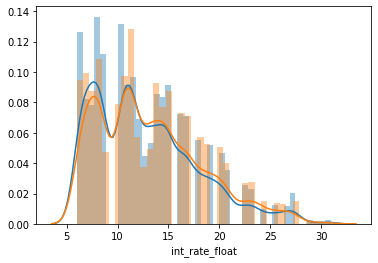

In [62]:
# Visualize that!
import seaborn as sns 
sns.distplot(managers['int_rate_float'])
sns.distplot(subordinates['int_rate_float'])

Convert term column from str to int

In [63]:
# Look at the term column
df['term'].head()

0     36 months
1     36 months
2     60 months
3     36 months
4     36 months
Name: term, dtype: object

In [64]:
# Take a closer look at the value's format
term_0 = df.loc[0, 'term']

print(term_0)
term_0

 36 months


' 36 months'

In [0]:
# Create function
def term_to_int(termstring):
  return int(termstring.strip().strip(' months'))


In [66]:
# Check that it works
term_to_int(term_0)

36

In [67]:
# Convert column
df['term_int'] = df['term'].apply(term_to_int)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'settlement_term', 'int_rate_float', 'int_rate_double',
       'emp_title_clean', 'emp_title_manager', 'issue_d_clean', 'year',
       'month', 'weekday', 'term_int'],
      dtype='object', length=153)

In [68]:
# Check dtype
df['term_int'].dtype

dtype('int64')

In [69]:
# Compare
df[['term', 'term_int']].head()

,term,term_int
0,36 months,36
1,36 months,36
2,60 months,60
3,36 months,36
4,36 months,36


In [70]:
# Can we do math?
df['term_double'] = df['term_int'] * 2
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'int_rate_float', 'int_rate_double', 'emp_title_clean',
       'emp_title_manager', 'issue_d_clean', 'year', 'month', 'weekday',
       'term_int', 'term_double'],
      dtype='object', length=154)

In [71]:
# Compare
df[['term', 'term_int', 'term_double']].head()

,term,term_int,term_double
0,36 months,36,72
1,36 months,36,72
2,60 months,60,120
3,36 months,36,72
4,36 months,36,72


In [0]:
# Make a column named loan_status_is_great. It should contain the integer 1 
# if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

In [0]:
# Create function
def status_to_int(statusstring):
  if (statusstring == 'Current') or (statusstring == 'Fully Paid'):
    return 1
  else:
    return 0

In [74]:
loan_status0 = df.loc[0, 'loan_status']
print(loan_status0)
loan_status0

Fully Paid


'Fully Paid'

In [75]:
# Check to see if it works
print(status_to_int('Current'))
print(status_to_int('Fully Paid'))
print(status_to_int('Not Paid'))


1
1
0


In [76]:
# Use function on column
df['loan_status_is_great'] = df['loan_status'].apply(status_to_int)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'int_rate_double', 'emp_title_clean', 'emp_title_manager',
       'issue_d_clean', 'year', 'month', 'weekday', 'term_int', 'term_double',
       'loan_status_is_great'],
      dtype='object', length=155)

In [77]:
# Compare
df[['loan_status', 'loan_status_is_great']].sample(6)

,loan_status,loan_status_is_great
83907,Current,1
34261,Current,1
52931,Current,1
8416,Current,1
27892,Current,1
84701,Fully Paid,1


In [78]:
# Check dtype
df['loan_status_is_great'].dtypes

dtype('int64')

Make last_pymnt_d_month and last_pymnt_d_year columns.

In [79]:
# Check for empty values
df['last_pymnt_d'].isnull().sum()

159

In [0]:
# Let's clean up the column
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(method='ffill')

In [81]:
# Check to ensure that the NaN values are gone
df['last_pymnt_d'].isnull().sum()

0

In [0]:
# Create new column with last_paymnt_d data converted to datetime
df['last_pymnt_d_clean'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)


In [83]:
# Confirm the data type
df['last_pymnt_d_clean'].dtype

dtype('<M8[ns]')

In [84]:
# Compare old and new
df[['last_pymnt_d', 'last_pymnt_d_clean']].head()

,last_pymnt_d,last_pymnt_d_clean
0,Aug-2019,2019-08-01
1,Jul-2019,2019-07-01
2,Oct-2019,2019-10-01
3,Oct-2019,2019-10-01
4,Oct-2019,2019-10-01


In [0]:
# Create new column and convert data to year
df['last_pymnt_d_year'] = df['last_pymnt_d_clean'].dt.year 

In [86]:
# Compare old and new
df[['last_pymnt_d_clean', 'last_pymnt_d_year']].head()

,last_pymnt_d_clean,last_pymnt_d_year
0,2019-08-01,2019
1,2019-07-01,2019
2,2019-10-01,2019
3,2019-10-01,2019
4,2019-10-01,2019


In [87]:
# Check new column's dtype
df['last_pymnt_d_year'].dtype

dtype('int64')

In [0]:
# Create new column and convert data to month
df['last_pymnt_d_month'] = df['last_pymnt_d_clean'].dt.month

In [89]:
# Compare old and new
df[['last_pymnt_d_clean', 'last_pymnt_d_month']].head()

,last_pymnt_d_clean,last_pymnt_d_month
0,2019-08-01,8
1,2019-07-01,7
2,2019-10-01,10
3,2019-10-01,10
4,2019-10-01,10


In [90]:
# Ensure there are no null values
print(df['last_pymnt_d_year'].isnull().sum())
df['last_pymnt_d_month'].isnull().sum()

0


0

In [91]:
# Check dtype
df['last_pymnt_d_month'].dtypes

dtype('int64')

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

## LendingClub Options ##

In [92]:
# Determine which column also contains a percent sign
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,int_rate_double,emp_title_clean,emp_title_manager,issue_d_clean,year,month,weekday,term_int,term_double,loan_status_is_great,last_pymnt_d_clean,last_pymnt_d_year,last_pymnt_d_month
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,...,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,28.94,Staff Physician,False,2018-12-01,2018,12,5,36,72,1,2019-08-01,2019,8
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,...,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,22.35,44.70,Director Of Sales,False,2018-12-01,2018,12,5,36,72,1,2019-07-01,2019,7
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9025.41,9025.41,2822.600000,2822.60,974.59,1848.01,0.0,0.0,0.0,Oct-2019,284.21,Nov-2019,Oct-2019,0,...,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,23.40,46.80,Unknown,False,2018-12-01,2018,12,5,60,120,1,2019-10-01,2019,10
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13271.86,13271.86,6236.010000,6236.01,3828.14,2407.87,0.0,0.0,0.0,Oct-2019,626.30,Nov-2019,Oct-2019,0,...,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,37.88,Receptionist,False,2018-12-01,2018,12,5,36,72,1,2019-10-01,2019,10
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx

In [93]:
# Take a closer look at that column
df['revol_util'].head()

0    43.2%
1    47.1%
2    53.9%
3      53%
4    28.6%
Name: revol_util, dtype: object

In [94]:
# Take a look at the value in the column's first cell
revol_0 = df.loc[0, 'revol_util']
print(revol_0)
revol_0

43.2%


'43.2%'

In [95]:
# Check for null values
df['revol_util'].isnull().sum()

156

In [0]:
# Clean up the null values
df['revol_util'] = df['revol_util'].fillna(method='ffill')

In [97]:
# Ensure the column was cleaned
df['revol_util'].isnull().sum()

0

In [0]:
# Create function to strip percent sign and convert strings into floats
def revol_to_float(revolstring):
  return float(revolstring.strip('%'))

In [99]:
# Apply the function to the column
df['revol_util_float'] = df['revol_util'].apply(revol_to_float)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'year', 'month', 'weekday', 'term_int', 'term_double',
       'loan_status_is_great', 'last_pymnt_d_clean', 'last_pymnt_d_year',
       'last_pymnt_d_month', 'revol_util_float'],
      dtype='object', length=159)

In [100]:
# Ensure the conversion worked
df['revol_util_float'].dtypes

dtype('float64')

In [101]:
# Compare old and new
df[['revol_util', 'revol_util_float']].head()

,revol_util,revol_util_float
0,43.2%,43.2
1,47.1%,47.1
2,53.9%,53.9
3,53%,53.0
4,28.6%,28.6


In [102]:
# Confirm math can be performed on the column values
df['revol_util_double'] = df['revol_util_float'] * 2
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'month', 'weekday', 'term_int', 'term_double', 'loan_status_is_great',
       'last_pymnt_d_clean', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'revol_util_float', 'revol_util_double'],
      dtype='object', length=160)

In [103]:
# Compare all three columns
df[['revol_util', 'revol_util_float', 'revol_util_double']].head()

,revol_util,revol_util_float,revol_util_double
0,43.2%,43.2,86.4
1,47.1%,47.1,94.2
2,53.9%,53.9,107.8
3,53%,53.0,106.0
4,28.6%,28.6,57.2


In [0]:
# Modify the emp_title column to replace titles with 'Other' if the title is not in the top 20.

In [105]:
# Identify the top 20 and create a variable that stores them
emp_top_20 = df['emp_title_clean'].value_counts(ascending=False).head(20)
emp_top_20

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title_clean, dtype: int64

In [106]:
# Take a look at the first and last five values
print(df['emp_title_clean'].head())
df['emp_title_clean'].tail()


0        Staff Physician
1      Director Of Sales
2                Unknown
3           Receptionist
4    Extrusion Assistant
Name: emp_title_clean, dtype: object


128407          Tax Consultant
128408          Security Guard
128409            Payoff Clerk
128410                 Unknown
128411    Key Accounts Manager
Name: emp_title_clean, dtype: object

In [107]:
# Check the first cell in the column
emp_title_loc0 = df.loc[0, 'emp_title_clean']
print(emp_title_loc0)

# Check the third cell in the column
emp_title_loc1 = df.loc[2, 'emp_title_clean']
emp_title_loc1

Staff Physician


'Unknown'

In [108]:
# Test method for checking if value is in top 20 value_count
print(emp_title_loc0 in emp_top_20)
print(emp_title_loc1 in emp_top_20)

False
True


In [0]:
# Create a function that can convert values not in the top 20 to 'Other'
def convert_to_other(empstring):
  if empstring in emp_top_20:
    return empstring
  else:
    return 'Other'

In [110]:
# Check to see the function works
print(convert_to_other(emp_title_loc0))
print(convert_to_other(emp_title_loc1))

Other
Unknown


In [111]:
df['emp_title_clean'].head()

0        Staff Physician
1      Director Of Sales
2                Unknown
3           Receptionist
4    Extrusion Assistant
Name: emp_title_clean, dtype: object

In [0]:
# Create new column and apply the function to the entire column
df['emp_title_clean2'] = df['emp_title_clean'].apply(convert_to_other)

In [113]:
# Compare the old and new columns
df[['emp_title_clean', 'emp_title_clean2']].sample(6)

,emp_title_clean,emp_title_clean2
70646,Paralegal,Other
71334,Unknown,Unknown
27222,Office Manager,Office Manager
100661,Server,Other
82787,Senior Applications Engineer,Other
29866,Medical Billing Specialist,Other


In [114]:
# Check the new value counts
df['emp_title_clean2'].value_counts(ascending=False)

Other                 89941
Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title_clean2, dtype: int64

In [115]:
# Check for a new column to play with
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,int_rate_double,emp_title_clean,emp_title_manager,issue_d_clean,year,month,weekday,term_int,term_double,loan_status_is_great,last_pymnt_d_clean,last_pymnt_d_year,last_pymnt_d_month,revol_util_float,revol_util_double,emp_title_clean2
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,28.94,Staff Physician,False,2018-12-01,2018,12,5,36,72,1,2019-08-01,2019,8,43.2,86.4,Other
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,22.35,44.70,Director Of Sales,False,2018-12-01,2018,12,5,36,72,1,2019-07-01,2019,7,47.1,94.2,Other
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9025.41,9025.41,2822.600000,2822.60,974.59,1848.01,0.0,0.0,0.0,Oct-2019,284.21,Nov-2019,Oct-2019,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,23.40,46.80,Unknown,False,2018-12-01,2018,12,5,60,120,1,2019-10-01,2019,10,53.9,107.8,Unknown
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13271.86,13271.86,6236.010000,6236.01,3828.14,2407.87,0.0,0.0,0.0,Oct-2019,626.30,Nov-2019,Oct-2019,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,18.94,37.88,Receptionist,False,2018-12-01,2018,12,5,36,72,1,2019-10-01,2019,10,53.0,106.0,Other
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep

In [126]:
# Check grade values
df['grade'].nunique()


7

In [128]:
# Only 7 unique values. Let's see what they are
df['grade'].value_counts(7)

A    0.296008
B    0.279265
C    0.241551
D    0.132947
E    0.046429
F    0.003014
G    0.000787
Name: grade, dtype: float64

In [0]:
# We can convert these to useable numbers for future exploration and visualization - or just for practice!
# Let's assign each letter to a number: 
# A=>0, B=>1, C=>2, D=>3, E=>4, F=>5, G=>6

In [0]:
# Create a function to convert letters to numbers
def letter_to_number(gradestring):
  if (gradestring == 'A'):
    return 0
  elif (gradestring == 'B'):
    return 1
  elif (gradestring == 'C'):
    return 2
  elif (gradestring == 'D'):
    return 3
  elif (gradestring == 'E'):
    return 4
  elif (gradestring == 'F'):
    return 5
  else:
    return 6

In [135]:
# Let's make sure the function works
print(letter_to_number('A'))
print(letter_to_number('B'))
print(letter_to_number('C'))
print(letter_to_number('D'))
print(letter_to_number('E'))
print(letter_to_number('F'))
print(letter_to_number('G'))

0
1
2
3
4
5
6


In [132]:
# Check for null values
df['grade'].isnull().sum()

0

In [136]:
# There are no empty values, so use the function to convert the column
df['grade_clean'] = df['grade'].apply(letter_to_number)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'term_int', 'term_double', 'loan_status_is_great', 'last_pymnt_d_clean',
       'last_pymnt_d_year', 'last_pymnt_d_month', 'revol_util_float',
       'revol_util_double', 'emp_title_clean2', 'grade_clean'],
      dtype='object', length=162)

In [138]:
# Compare old and new
df[['grade', 'grade_clean']].sample(6)

,grade,grade_clean
120286,D,3
119970,C,2
126995,A,0
52693,D,3
27734,A,0
121909,B,1


In [139]:
# Let's look at funded amount
df['funded_amnt'].head()

0    35000
1     5000
2    10000
3    17100
4     4000
Name: funded_amnt, dtype: int64

In [140]:
# Check for empty values
df['funded_amnt'].isnull().sum()

0

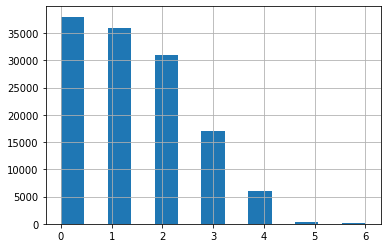

In [156]:
# Let's do some visualization practice
df['grade_clean'].hist(bins=13);

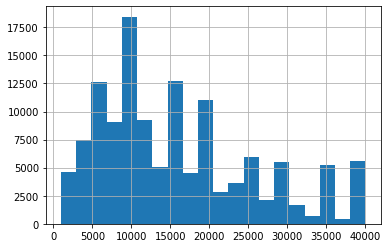

In [161]:
df['funded_amnt'].hist(bins=20);

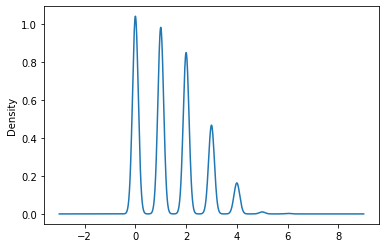

In [176]:
df['grade_clean'].plot.density();

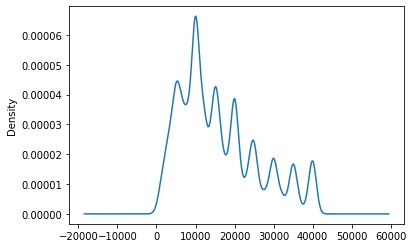

In [177]:
df['funded_amnt'].plot.density();